In [1]:
import psfws
import matplotlib.pyplot as plt
import numpy as np

### intended use: simply instantiate with a seed and then draw set(s) of parameters

In [2]:
pgen = psfws.ParameterGenerator(seed=129387)
pgen.draw_parameters()

{'u': array([[-2.31285471],
        [-0.73335819],
        [ 1.35721882],
        [ 5.98090008],
        [13.71041855],
        [ 9.11313588]]),
 'v': array([[ 2.92478476],
        [ 4.74970563],
        [ 7.00874192],
        [ 4.09603786],
        [ 0.60653241],
        [-0.80114407]]),
 'speed': array([[ 3.72876156],
        [ 4.8059877 ],
        [ 7.13894294],
        [ 7.24904766],
        [13.72382813],
        [ 9.14828276]]),
 'direction': array([[-218.33616299],
        [-188.77720189],
        [-169.04051519],
        [-124.40541362],
        [ -92.53304471],
        [ -84.97599173]]),
 'h': array([ 2.965     ,  7.09491139, 11.22482279, 11.82863533, 14.91431767,
        18.        ]),
 'j': [6.807038897547639e-14,
  3.188332285198168e-15,
  5.819602279023117e-15,
  2.0757574230880904e-15,
  3.4163091984249562e-15,
  5.990539979267242e-16]}

### illustrating the process

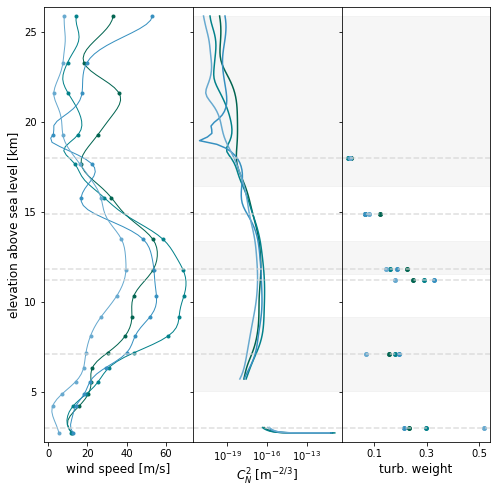

In [12]:
fig, a = plt.subplots(1,3, sharey=True)
colors = ['#d0d1e6','#a6bddb','#67a9cf','#3690c0','#02818a','#016450'][::-1]

for i in range(4):
#     pt = [241,513,484,280][i]
    # pick a random dataset
    pt = pgen._rng.choice(range(pgen.N))
    col = colors[i]
    
    # and get the wind parameters
    parameters = pgen.get_raw_wind(pt)
    a[0].plot(parameters['speed'], parameters['h'], 'o', ms=3, color=col)
    
    # for visualization, interpolate these wind parameters 
    new_h = np.linspace(min(parameters['h']), max(parameters['h']), 100)
    gp_out = pgen._interpolate_wind(parameters, new_h, kind='gp')
    a[0].plot(gp_out['speed'], gp_out['h'], '-', linewidth=1, color=col)
    
    # get the cn2 models for this dataset; plot the ground layer and atm parts separately
    cn2, h_cn2 = pgen.get_cn2(pt)
    a[1].plot(cn2[h_cn2>2+pgen.h0], h_cn2[h_cn2>2+pgen.h0], '-', ms=3, color=col)
    a[1].plot(cn2[h_cn2<2+pgen.h0], h_cn2[h_cn2<2+pgen.h0], '-', ms=3, color=col)

    # get turbulence integrals: under the hood, the gap cn2 values is interpolated over, and whole is integrated
    j_ex, bin_edges, bin_centers = pgen.get_turbulence_integral(pt)
    # plot normalized tubulence integrals
    a[2].plot([i/sum(j_ex) for i in j_ex], bin_centers, 'o', color=col, ms=4)
    
a[0].set_ylim([min(parameters['h'])-.5, max(parameters['h'])+.5])
a[0].set_xlabel('wind speed [m/s]', fontsize=12)
a[1].set_xlabel('$C_N^2$ [m$^{-2/3}$]', fontsize=12)
a[0].set_ylabel('elevation above sea level [km]', fontsize=12)
a[2].set_xlabel('turb. weight', fontsize=12)
    
a[1].set_xscale('log')
a[2].set_xticks([0.1,0.3,0.5])

# these are the discrete layers
[[a[j].axhline(b, linestyle='--', linewidth=1.5, 
               color='lightgray', alpha=0.75) for b in bin_centers] 
 for j in range(3)]

# these show the integration bounds for the discrete layers
for j in [1,2]:
    xlims = a[j].get_xlim()
    [a[j].fill_between(xlims, bin_edges[i], bin_edges[i+1], alpha=0.2, color='lightgray') for i in [1,3,5]]
    a[j].set_xlim(xlims)

plt.subplots_adjust(wspace=0)
fig.set_size_inches(8,8)

Dotted lines across whole figure denote the output layer altitudes.

Leftmost panel: wind speed data-points and interpolation of these for at each time point. 

Middle panel: Cn2 models. There is a gap between the upper atmosphere models (derived using Hufnagel model and wind speeds from left panel) and ground layer models (independent of wind, each model randomly drawn using model and parameters from Tokovinin 2010).  

Rightmost panel: normalized turbulence integrals. Each value is the integrated Cn2 corresponding to the layer it sits on, with integration bounds given by the alternating grey and white regions in the right two panels. 

### Relation to draw_parameters output: 

A call to pgen.draw_parameters() will output the set of layer altitudes, and the following parameters 